In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from pathlib import Path
from dispatches.case_studies.renewables_h2_case.re_h2_parameters import *
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [149]:
results_df = pd.read_parquet(re_h2_dir / "design_results.parquet")
df = pd.read_csv(re_h2_dir / "data" / "Wind_Thermal_Gen.csv", index_col="Datetime", parse_dates=True)
results_df.insert(loc=0, column='Wind Load [MW]', value=wind_loads_mw[:len(results_df)])
results_df.insert(loc=0, column='Underpower [MW]', value=results_df['Wind Load [MW]'] - results_df['Total Power Output [MW]'])
results_df['Underpower [MW]'] = results_df['Underpower [MW]'].clip(lower=0)


In [150]:
results_df.columns

Index(['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]',
       'Peaker Sold Power Month [MWh]', 'Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]', 'Peaker Dispatch CF Month [1]'],
      dtype='object')

In [151]:
results_df.iloc[results_df['Peaker Power Output [MW]'].argmax()]

Underpower [MW]                    0.000000
Wind Load [MW]                   664.500000
Total Wind Generation [MW]       664.642802
Total Power Output [MW]          664.823313
Wind Power Output [MW]           664.499195
Wind Power to Battery [MW]         0.026897
State of Charge [MWh]              0.284840
Battery Power Output [MW]          0.306826
Wind Power to PEM [MW]             0.116711
PEM H2 Output [kg]                 2.123821
Tank H2 Input [kg]                 2.123821
H2 Sales [kg]                      0.229646
Turbine H2 Input [kg]"             0.864635
Tank Holdup [kg]                  68.916370
Turbine Power Output [MW]          0.017293
Peaker Power Output [MW]           0.318179
Peaker Sold Power Month [MWh]      0.201112
Peaker Energy Price [$/MWh]        9.035457
Peaker Revenue [$]                 1.817138
Peaker Dispatch CF Month [1]       0.000047
Name: 4088, dtype: float64

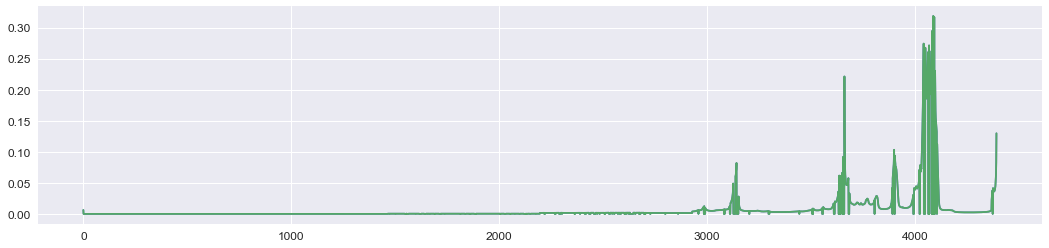

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
ax.plot(results_df['Peaker Power Output [MW]'])
ax.plot(results_df['Peaker Power Output [MW]'])

In [153]:
results_df = results_df.set_index(df.index[:len(results_df)])
resampling_d = {k: np.sum for k in ['Underpower [MW]', 'Wind Load [MW]', 'Total Wind Generation [MW]',
       'Total Power Output [MW]', 'Wind Power Output [MW]',
       'Wind Power to Battery [MW]', 'State of Charge [MWh]',
       'Battery Power Output [MW]', 'Wind Power to PEM [MW]',
       'PEM H2 Output [kg]', 'Tank H2 Input [kg]', 'H2 Sales [kg]',
       'Turbine H2 Input [kg]"', 'Tank Holdup [kg]',
       'Turbine Power Output [MW]', 'Peaker Power Output [MW]']}
resampling_d.update(  
       {k: np.mean for k in ['Peaker Energy Price [$/MWh]',
       'Peaker Revenue [$]',
       'Peaker Sold Power Month [MWh]',
       'Peaker Dispatch CF Month [1]']})
results_df_month = results_df.resample("1M").agg(resampling_d)
results_df_month

,Underpower [MW],Wind Load [MW],Total Wind Generation [MW],Total Power Output [MW],Wind Power Output [MW],Wind Power to Battery [MW],State of Charge [MWh],Battery Power Output [MW],Wind Power to PEM [MW],PEM H2 Output [kg],Tank H2 Input [kg],H2 Sales [kg],"Turbine H2 Input [kg]""",Tank Holdup [kg],Turbine Power Output [MW],Peaker Power Output [MW],Peaker Energy Price [$/MWh],Peaker Revenue [$],Peaker Sold Power Month [MWh],Peaker Dispatch CF Month [1]
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.0,387765.482755,393538.362180,393466.642499,393383.420194,75.312427,715.508799,67.197250,79.629559,1449.044822,1449.044822,597.056542,801.252787,41733.331948,16.025056,0.016279,9.188746,46.383909,4.768235,0.001121
2020-02-29,0.0,166409.097941,170543.387280,170499.286674,170436.780346,55.182881,651.976779,49.814339,51.424054,935.780129,935.780129,321.883534,634.599406,39482.466978,12.691988,0.037189,9.188746,46.383909,4.768235,0.001121
2020-03-31,0.0,221807.620536,226469.179201,226411.311228,226337.860038,64.809548,706.860679,58.276870,66.509614,1210.296949,1210.296949,431.383890,758.715954,43166.075485,15.174319,0.198627,9.188746,46.383909,4.768235,0.001121
2020-04-30,0.0,124516.917683,128495.287782,128446.598775,128373.152492,67.013684,687.621560,60.482932,55.121605,1003.065668,1003.065668,363.290902,648.167515,43906.584301,12.963350,1.000131,9.188746,46.383909,4.768235,0.001121
2020-05-31,0.0,122320.295117,127160.955844,127126.386837,127057.980804,64.490442,662.179595,58.832993,38.484598,700.316665,700.316665,212.175985,478.651989,39142.287754,9.573040,4.928245,9.188746,46.383909,4.768235,0.001121
2020-06-30,0.0,128218.000114,129820.632725,129800.181877,129740.799194,57.858335,697.115300,52.558830,21.975196,399.889742,399.889742,110.213723,341.192635,43436.625538,6.823853,21.379016,9.188746,46.383909,4.768235,0.001121
2020-07-31,0.0,7706.432483,7751.894207,7751.006745,7748.313425,2.744719,17.454969,2.476148,0.836063,15.214108,15.214108,4.164600,10.858620,435.703117,0.217172,1.056181,9.188746,46.383909,4.768235,0.001121
